In [1]:
INPUT_PATH = './input/'

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout
from keras.layers import Convolution2D, MaxPooling2D, Flatten
from keras.utils import plot_model, np_utils
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from scipy import ndimage

Using TensorFlow backend.


In [3]:
train = pd.read_csv('train.csv')
train.sample(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10799,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30753,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_y = keras.utils.to_categorical(train.label.values)

In [5]:
train_y.shape

(42000, 10)

In [6]:
train_x = train.drop('label', axis=1).values

In [7]:
def normalize(array):
    # Normalize the data
    array = array.astype(np.float32) / 255.0 
    a = array-array.mean(axis=1,keepdims=True)
    a = a / array.std(axis = 1,keepdims = True)
    return a

train_x = normalize(train_x)

In [8]:
train_x = train_x.reshape(train_x.shape[0],28,28,1)

In [9]:
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.33, random_state=777)

In [10]:
train_x.shape

(28140, 28, 28, 1)

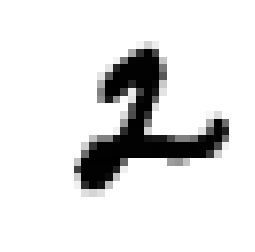

In [11]:
# display image
def display(img):
    
    # (4096) => (64,64)
    one_image = img.reshape(28,28)
    
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary)


display(train_x[10])

In [12]:
model = keras.models.Sequential()
# Hidden layer of 512 neurons
Layer1 = Convolution2D(32,3,3, activation='relu', input_shape=(28,28,1,))
model.add(Layer1)
model.add(Convolution2D(32,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))


C:\Users\akumar47\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  app.launch_new_instance()
C:\Users\akumar47\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [13]:

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [14]:
history = model.fit(train_x, train_y, batch_size=32, epochs=, validation_data=(test_x, test_y))

Train on 28140 samples, validate on 13860 samples
Epoch 1/30
28140/28140 [==============================] - 49s - loss: 0.2004 - acc: 0.9384 - val_loss: 0.0657 - val_acc: 0.9803
Epoch 2/30
28140/28140 [==============================] - 51s - loss: 0.0674 - acc: 0.9785 - val_loss: 0.0531 - val_acc: 0.9848
Epoch 3/30
28140/28140 [==============================] - 50s - loss: 0.0510 - acc: 0.9837 - val_loss: 0.0466 - val_acc: 0.9863
Epoch 4/30
28140/28140 [==============================] - 50s - loss: 0.0409 - acc: 0.9870 - val_loss: 0.0505 - val_acc: 0.9861
Epoch 5/30
28140/28140 [==============================] - 47s - loss: 0.0325 - acc: 0.9899 - val_loss: 0.0455 - val_acc: 0.9878
Epoch 6/30
28140/28140 [==============================] - 46s - loss: 0.0260 - acc: 0.9917 - val_loss: 0.0542 - val_acc: 0.9865
Epoch 7/30
28140/28140 [==============================] - 47s - loss: 0.0276 - acc: 0.9909 - val_loss: 0.0434 - val_acc: 0.9888
Epoch 8/30
28140/28140 [==============================

In [15]:
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

13760/13860 [============================>.] - ETA: 0sTest loss: 0.0661408671818
Test accuracy: 0.989393939394


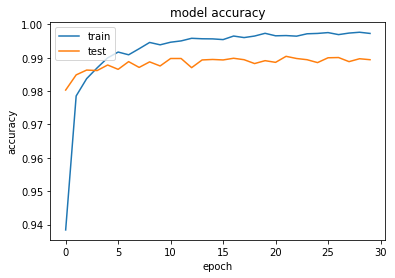

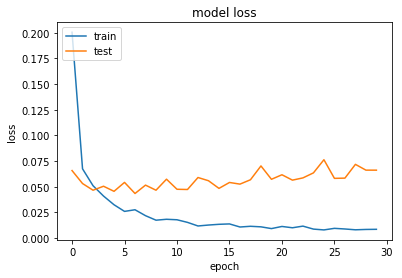

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
train = pd.read_csv('train.csv')
train_y = keras.utils.to_categorical(train.label.values)
train_x = train.drop('label', axis=1).values
train_x = normalize(train_x)
train_x = train_x.reshape(train_x.shape[0],28,28,1)
model = get_model()
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=32, epochs=10)

C:\Users\akumar47\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
C:\Users\akumar47\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


Epoch 1/10
42000/42000 [==============================] - 72s - loss: 0.1581 - acc: 0.9506    
Epoch 2/10
42000/42000 [==============================] - 71s - loss: 0.0624 - acc: 0.9810    
Epoch 3/10
42000/42000 [==============================] - 69s - loss: 0.0444 - acc: 0.9859    
Epoch 4/10
42000/42000 [==============================] - 68s - loss: 0.0351 - acc: 0.9884    
Epoch 5/10
42000/42000 [==============================] - 64s - loss: 0.0281 - acc: 0.9906    
Epoch 6/10
42000/42000 [==============================] - 71s - loss: 0.0259 - acc: 0.9913    
Epoch 7/10
42000/42000 [==============================] - 73s - loss: 0.0217 - acc: 0.9927    
Epoch 8/10
42000/42000 [==============================] - 72s - loss: 0.0192 - acc: 0.9938    
Epoch 9/10
42000/42000 [==============================] - 74s - loss: 0.0212 - acc: 0.9933    
Epoch 10/10
42000/42000 [==============================] - 75s - loss: 0.0132 - acc: 0.9955    


(28, 28)


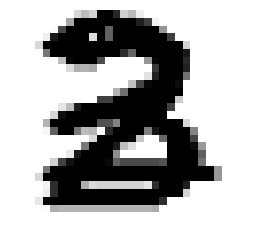

In [67]:
from scipy import misc
import glob
a = np.zeros(shape=(1,784))
for image_path in glob.glob("C:\\Users\\akumar47\\Dropbox\\Courses\\ECSE 512 - DSP\\Project_\\write images\\*.png"):
    image = np.dot(misc.imread(image_path)[...,:3], [0.299, 0.587, 0.114])
    a =np.concatenate((a,255.0- np.reshape(image,(1,784))))
    print (image.shape)
a=a[1:,:]


df = pd.DataFrame(a)
df.to_csv("./test.csv",index=False)
#a.tofile('./test.csv',sep=',')
display(a[0])




In [68]:
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted


In [69]:

# create an array where we can store our 4 pictures
images = np.zeros((10,784))
# and the correct values
correct_vals = np.zeros((4,10))
import cv2
a = np.zeros(shape=(1,784))
# we want to test our images which you saw at the top of this page
i = 0
for image in glob.glob("C:\\Users\\akumar47\\Dropbox\\Courses\\ECSE 512 - DSP\\Project_\\write images\\*.png"):
    # read the image
    gray = cv2.imread(image, 0)
    # resize the images and invert it (black background)
    (thresh, gray) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    gray = cv2.resize(255-gray, (28, 28))
    
    #fitting to a 20-20 box
    while np.sum(gray[0]) == 0:
        gray = gray[1:]

    while np.sum(gray[:,0]) == 0:
        gray = np.delete(gray,0,1)

    while np.sum(gray[-1]) == 0:
        gray = gray[:-1]

    while np.sum(gray[:,-1]) == 0:
        gray = np.delete(gray,-1,1)

    rows,cols = gray.shape
    
    if rows > cols:
        factor = 20.0/rows
        rows = 20
        cols = int(round(cols*factor))
        gray = cv2.resize(gray, (cols,rows))
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        gray = cv2.resize(gray, (cols, rows))
        
    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')
    
    shiftx,shifty = getBestShift(gray)
    shifted = shift(gray,shiftx,shifty)
    gray = shifted

    a = np.concatenate((a,np.reshape(np.array(gray),(1,784))))
    # save the processed images
    cv2.imwrite("./pro-img/image_"+str(i)+".png", gray)
    
    """
    all images in the training set have an range from 0-1
    and not from 0-255 so we divide our flatten images
    (a one dimensional vector with our 784 pixels)
    to use the same 0-1 based range
    """
    flatten = gray.flatten() / 255.0
    """
    we need to store the flatten image and generate
    the correct_vals array
    correct_val for the first digit (9) would be
    [0,0,0,0,0,0,0,0,0,1]
    """
    #images[i] = flatten
    #correct_val = np.zeros((10))
    #correct_val[i] = 1
    #correct_vals[i] = correct_val
    i += 1

a=a[1:,:]
df = pd.DataFrame(a)
df.to_csv("./test.csv",index=False)    


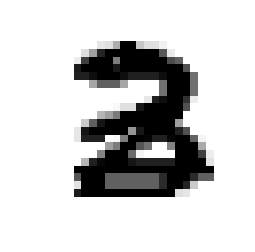

In [70]:
test = pd.read_csv('test.csv')
test_x = normalize(test.values)
# output image
display(test_x[0])
test_x = test_x.reshape(test_x.shape[0],28,28,1)
     

predictions = model.predict(test_x)

In [71]:
import time

# select the indix with the maximum probability
predictions = np.argmax(predictions,axis = 1)
predictions = pd.Series(predictions,name="Label")

submission = pd.concat([pd.Series(range(1,len(a)),name = "ImageId"),predictions],axis = 1)

submission.to_csv('prediction.acc_' + str(score[1]) + '.csv', index=False)

In [72]:
predictions

0    3
Name: Label, dtype: int64

In [73]:
np.argmax(predictions,axis = 1)

0

In [74]:
proba = model.predict_proba(test_x, batch_size=100)

1/1 [==============================] - 0s


In [75]:
list(proba[0])

[4.9913894e-18,
 2.2419269e-10,
 0.0052604363,
 0.99463212,
 9.7116019e-19,
 1.452569e-14,
 1.2509119e-16,
 8.2476129e-07,
 0.00010656352,
 1.1259787e-15]

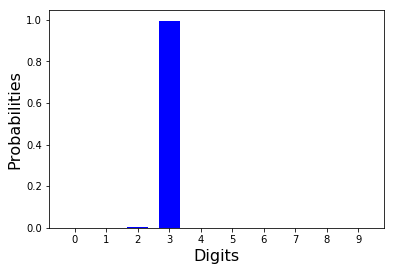

In [76]:
import matplotlib.pyplot as plt
import plotly.plotly as py

y = list(proba[0])
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.ylabel('Probabilities', fontsize=16)
plt.xlabel('Digits', fontsize=16)